# GRIP Feb'21 at The Sparks Foundation

## TASK 6 - Prediction using Decision Tree Algorithm

## Submitted by Madhura Shegaonkar

### Importing Libraries

In [149]:
import sklearn.datasets as ds
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [150]:
df = pd.read_csv('Iris.csv')

### Let's take a look at the dataset

In [151]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [152]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Getting the information about the dataset

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [154]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [155]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### Checking for null values

In [156]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [157]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Data Visualization

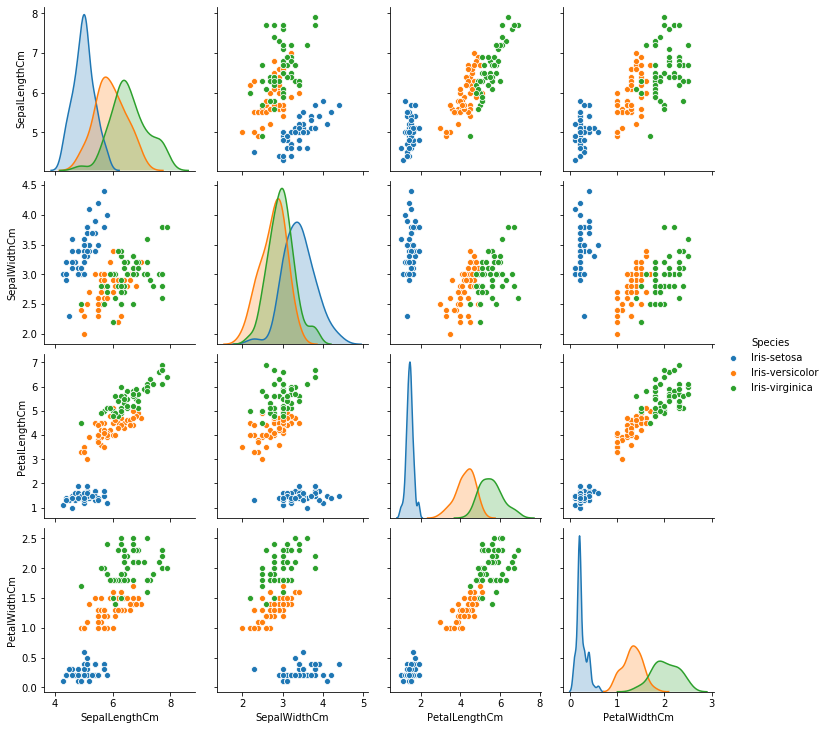

In [158]:
sns.pairplot(df, hue='Species');

### Splitting of data 

In [159]:
X = df.drop('Species', axis=1)
Y = df.Species

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [161]:
print('Train set : ', X_train.shape, y_train.shape)
print('Test set : ', X_test.shape, y_test.shape)

Train set :  (105, 4) (105,)
Test set :  (45, 4) (45,)


### Fitting on data

In [162]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

### Making Predictions

In [163]:
y_predict = dtree.predict(X_test)

### Making Confusion Matrix and checking the accuracy

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [165]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_predict, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [166]:
print('Accuracy = ', accuracy_score(y_predict, y_test)*100, '%')

Accuracy =  100.0 %


### Decision Tree Plotting

In [167]:
from sklearn import tree
import matplotlib.pyplot as plt

In [168]:
feature_names = list(df.columns.values)
feature_names

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

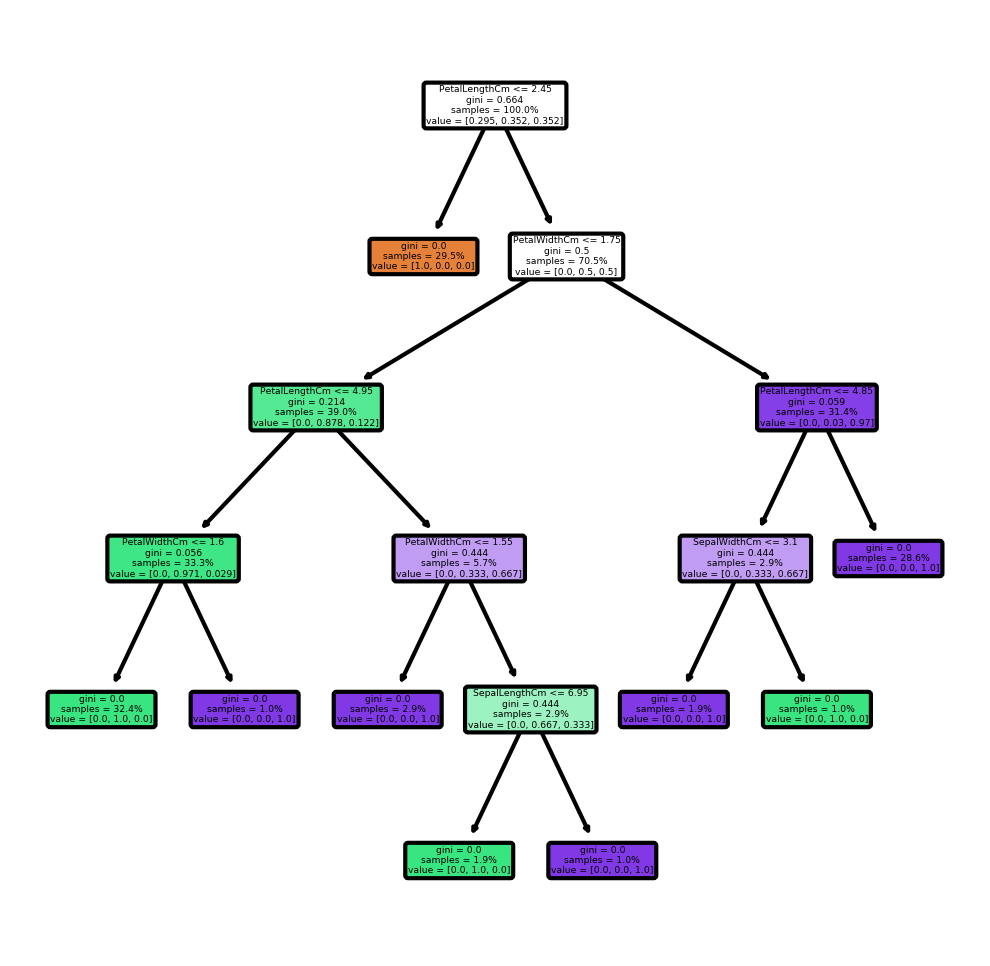

In [169]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
#plt.figure()
tree.plot_tree(dtree, feature_names = feature_names, rounded=True,
                 filled = True, proportion = True);
plt.show()

### Visualizing the classifier

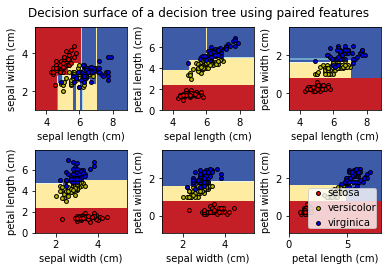

<Figure size 14400x14400 with 0 Axes>

In [170]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

iris=ds.load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    dtree = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(200,200))
plt.show()


In [ ]:
#Thank you for watching!!!!